# A* pathplanning:-

In [111]:
import numpy as np
from math import dist
import matplotlib.pyplot as plt

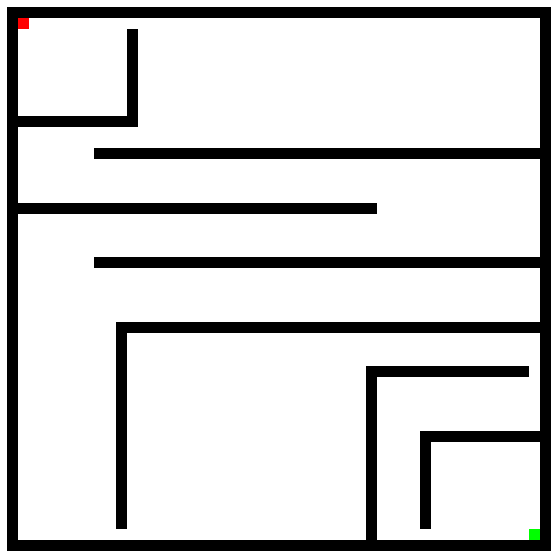

In [112]:
#import map 

map = plt.imread('map.png')   ############## 1. Change the map here ##############<----------------------------------------------
map=np.array(map)
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the figsize as needed
ax.axis('off')
ax.imshow(map)

In [113]:
#create a class for node
class node_class:
    def __init__(self,position,g,h,f,parent):
        self.position=position
        self.g=g
        self.h=h
        self.f=f
        self.parent=parent

In [114]:
start=None    #red
goal=None     #green
for i in range(map.shape[0]):
    for j in range(map.shape[1]):
        if map[i,j,0]==1.0 and map[i,j,1]==0.0 and map[i,j,2]==0.0:
            start=node_class([i,j],0,0,0,None)
        if map[i,j,0]==0.0 and map[i,j,1]==1.0 and map[i,j,2]==0.0:
            goal=node_class([i,j],0,0,0,None)

In [115]:
def successors(node):
    successors=[]
    for i in range(-1,2):
        for j in range(-1,2):
            if i==0 and j==0:
                continue
            if node.position[0]+i<0 or node.position[0]+i>=map.shape[0] or node.position[1]+j<0 or node.position[1]+j>=map.shape[1]:
                continue
            if map[node.position[0]+i,node.position[1]+j,0]==0.0 and map[node.position[0]+i,node.position[1]+j,1]==0.0 and map[node.position[0]+i,node.position[1]+j,2]==0.0:
                continue
            successors.append(node_class([node.position[0]+i,node.position[1]+j],0,0,0,None))
    return successors

In [116]:
def A_star(start,goal):
    #start and goal

    #initialize open and closed list
    open_list=[]
    closed_list=[]
    #add start node to open list
    open_list.append(start)
    
    while len(open_list)>0:

        #get minimum current node
        parent=open_list[0]
        parent_index=0
        for index,item in enumerate(open_list):
            if item.f<parent.f:
                parent=item
                parent_index=index
        open_list.pop(parent_index)
        closed_list.append(parent)
        #map[parent.position[0],parent.position[1]]=[1,0,1]


        if parent.position==goal.position:
            path=[]
            current=parent
            while current is not None:
                path.append(current.position)
                current=current.parent
            return path[::-1]


        for child in successors(parent):
            flag=0
            
            child.g=parent.g+dist(child.position,parent.position)
            child.h=dist(child.position,goal.position)
            child.f=child.g+child.h
            child.parent=parent


            for index,closed_child in enumerate(closed_list):
                if child.position==closed_child.position:
                    flag=1
                    if child.f<closed_child.f:
                        closed_list[index]=child
                
            if flag==1:
                continue

            for index,open_child in enumerate(open_list):
                if child.position==open_child.position:
                    flag=1
                    if child.f<open_child.f:
                        open_list[index]=child

            if flag==1:
                continue

            open_list.append(child)
            #map[child.position[0],child.position[1]]=[1,1,0]

    if len(open_list)==0:
        return "Goal is unreachable"

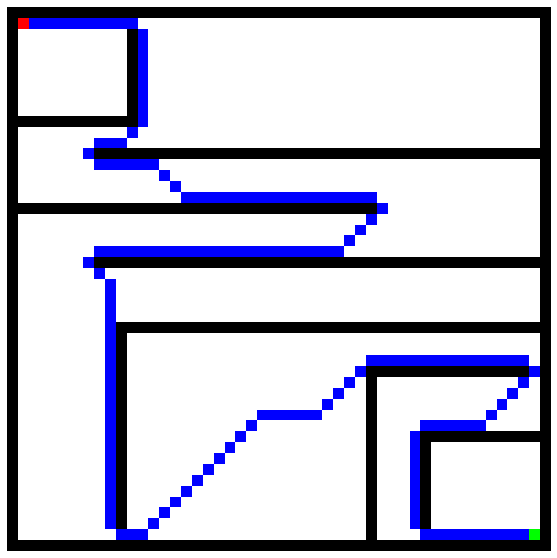

In [117]:
#Draw path on map
path=A_star(start,goal)

if path == "Goal is unreachable":
    print(path)

else:
    for i in range(len(path)):
        map[path[i][0],path[i][1]]=[0,0,1]

    map[start.position[0],start.position[1]]=[1,0,0]
    map[goal.position[0],goal.position[1]]=[0,1,0]


    fig, ax = plt.subplots(figsize=(10, 10))
    ax.axis('off')
    ax.imshow(map)